In [1]:
# Source code - https://dev.socrata.com/foundry/data.cityofnewyork.us/fhrw-4uyv
!pip install pandas

In [2]:
!pip install sodapy

In [3]:
import pandas as pd
from sodapy import Socrata

In [4]:
client = Socrata("data.cityofnewyork.us", None)

In [5]:
results = client.get("fhrw-4uyv", limit=2000)

In [6]:
results_df = pd.DataFrame.from_records(results)

In [7]:
results_df.shape

(2000, 48)

In [8]:
results_df.columns

Index(['address_type', 'agency', 'agency_name', 'borough',
       'bridge_highway_direction', 'bridge_highway_name',
       'bridge_highway_segment', 'city', 'closed_date', 'community_board',
       'complaint_type', 'created_date', 'cross_street_1', 'cross_street_2',
       'descriptor', 'due_date', 'facility_type', 'incident_address',
       'incident_zip', 'intersection_street_1', 'intersection_street_2',
       'landmark', 'latitude', 'location', 'location_type', 'longitude',
       'park_borough', 'park_facility_name', 'resolution_action_updated_date',
       'resolution_description', 'road_ramp', 'school_address', 'school_city',
       'school_code', 'school_name', 'school_not_found', 'school_number',
       'school_phone_number', 'school_region', 'school_state', 'school_zip',
       'status', 'street_name', 'taxi_company_borough',
       'taxi_pick_up_location', 'unique_key', 'x_coordinate_state_plane',
       'y_coordinate_state_plane'],
      dtype='object')

In [9]:
results_df.columns.size

48

In [10]:
results_df["borough"].value_counts()

BROOKLYN         605
QUEENS           482
MANHATTAN        461
BRONX            374
STATEN ISLAND     78
Name: borough, dtype: int64

In [11]:
results_df["created_date"]

0       2016-01-20T13:25:49.000
1       2016-01-20T21:44:13.000
2       2016-01-20T12:27:32.000
3       2016-01-20T16:27:19.000
4       2016-01-20T11:17:07.000
5       2016-01-20T13:27:08.000
6       2016-01-20T13:58:44.000
7       2016-01-20T16:19:41.000
8       2016-01-20T11:53:40.000
9       2016-01-20T19:56:24.000
10      2016-01-20T15:05:29.000
11      2016-01-20T11:34:29.000
12      2016-01-20T20:47:40.000
13      2016-01-20T14:06:59.000
14      2016-01-20T21:44:13.000
15      2016-01-20T11:27:41.000
16      2016-01-20T09:47:18.000
17      2016-01-20T02:13:55.000
18      2016-01-20T11:29:04.000
19      2016-01-20T07:49:24.000
20      2016-01-20T21:17:45.000
21      2016-01-20T21:49:40.000
22      2016-01-20T10:48:56.000
23      2016-01-20T09:01:42.000
24      2016-01-20T18:22:37.000
25      2016-01-20T15:24:36.000
26      2016-01-20T18:02:58.000
27      2016-01-20T16:05:44.000
28      2016-01-20T11:34:40.000
29      2016-01-20T13:32:08.000
                 ...           
1970    

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [28]:
import datetime
def parse_full_date(row):
    date = datetime.datetime.strptime(row["created_date"], "%Y-%m-%dT%H:%M:%S.%f")
    return date

results_df["created_date"] = results_df.apply(parse_full_date, axis=1)

In [29]:
results_df["created_date"]

0      2016-01-20 13:25:49
1      2016-01-20 21:44:13
2      2016-01-20 12:27:32
3      2016-01-20 16:27:19
4      2016-01-20 11:17:07
5      2016-01-20 13:27:08
6      2016-01-20 13:58:44
7      2016-01-20 16:19:41
8      2016-01-20 11:53:40
9      2016-01-20 19:56:24
10     2016-01-20 15:05:29
11     2016-01-20 11:34:29
12     2016-01-20 20:47:40
13     2016-01-20 14:06:59
14     2016-01-20 21:44:13
15     2016-01-20 11:27:41
16     2016-01-20 09:47:18
17     2016-01-20 02:13:55
18     2016-01-20 11:29:04
19     2016-01-20 07:49:24
20     2016-01-20 21:17:45
21     2016-01-20 21:49:40
22     2016-01-20 10:48:56
23     2016-01-20 09:01:42
24     2016-01-20 18:22:37
25     2016-01-20 15:24:36
26     2016-01-20 18:02:58
27     2016-01-20 16:05:44
28     2016-01-20 11:34:40
29     2016-01-20 13:32:08
               ...        
1970   2016-01-21 13:56:50
1971   2016-01-21 15:46:17
1972   2016-01-21 17:12:38
1973   2016-01-21 14:17:10
1974   2016-01-21 23:36:02
1975   2016-01-21 09:20:00
1

In [35]:
results_df["created_date"].dt.time

0       13:25:49
1       21:44:13
2       12:27:32
3       16:27:19
4       11:17:07
5       13:27:08
6       13:58:44
7       16:19:41
8       11:53:40
9       19:56:24
10      15:05:29
11      11:34:29
12      20:47:40
13      14:06:59
14      21:44:13
15      11:27:41
16      09:47:18
17      02:13:55
18      11:29:04
19      07:49:24
20      21:17:45
21      21:49:40
22      10:48:56
23      09:01:42
24      18:22:37
25      15:24:36
26      18:02:58
27      16:05:44
28      11:34:40
29      13:32:08
          ...   
1970    13:56:50
1971    15:46:17
1972    17:12:38
1973    14:17:10
1974    23:36:02
1975    09:20:00
1976    07:46:00
1977    07:38:57
1978    22:21:41
1979    21:15:18
1980    22:15:56
1981    23:00:02
1982    08:48:00
1983    00:17:00
1984    15:17:20
1985    21:44:30
1986    13:49:55
1987    01:49:44
1988    22:24:51
1989    18:16:00
1990    18:55:14
1991    16:14:00
1992    07:17:00
1993    16:27:06
1994    07:43:57
1995    18:34:26
1996    10:08:07
1997    17:12:

(array([    4.,     0.,    61.,  1888.,    43.,     4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 6 Patch objects>)

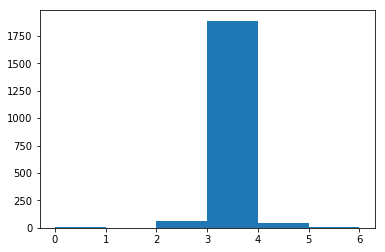

In [36]:
plt.hist(results_df["created_date"].dt.weekday, bins=6)

(array([  72.,   22.,   26.,   11.,   16.,   24.,   38.,   69.,   69.,
         125.,  140.,  140.,  128.,  132.,  128.,  137.,  108.,  110.,
         115.,   72.,   78.,   88.,   85.,   67.]),
 array([  0.        ,   0.95833333,   1.91666667,   2.875     ,
          3.83333333,   4.79166667,   5.75      ,   6.70833333,
          7.66666667,   8.625     ,   9.58333333,  10.54166667,
         11.5       ,  12.45833333,  13.41666667,  14.375     ,
         15.33333333,  16.29166667,  17.25      ,  18.20833333,
         19.16666667,  20.125     ,  21.08333333,  22.04166667,  23.        ]),
 <a list of 24 Patch objects>)

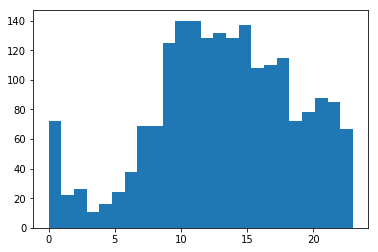

In [37]:
plt.hist(results_df["created_date"].dt.hour, bins=24)